<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#What-is-positional-encoding?" data-toc-modified-id="What-is-positional-encoding?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is positional encoding?</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Positional-encoding" data-toc-modified-id="Positional-encoding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Positional encoding</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Requirements</a></span></li></ul></div>

# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-warning">
<font color=black>

**What?** Positional Encoding in Transformer Models

</font>
</div>

# What is positional encoding?
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-info">
<font color=black>

- In NLP, the order of the words in a sentence matters. 
- RNNs have an inbuilt mechanism that deals with the order of sequences. 
- The transformer model, however, does not use recurrence or convolution and treats each data point as independent of the other. Positional encoding is the scheme through which the knowledge of the order of objects in a sequence is maintained.
    
- **Why numbers, such as the index value, is not used to encode each word? For long sequences, the indices can grow large in magnitude. If you normalize the index value to lie between 0 and 1, it can create problems for variable length sequences as they would be normalized differently.
 
</font>
</div>

# Imports
<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Positional encoding
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-info">
<font color=black>

- Suppose you have an input sequence of length L and require the position of the k-th object within this sequence. - The positional encoding is given by sine and cosine functions of varying frequencies.

</font>
</div>

 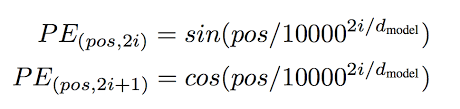

<div class="alert alert-block alert-info">
<font color=black>


- Let’s take an example of the phrase “I am a robot,” with n=100 and d=4. 
- The positional encoding matrix for this phrase. In fact, the positional encoding matrix would be the same for any four-letter phrase with n=100 and d=4.

</font>
</div>


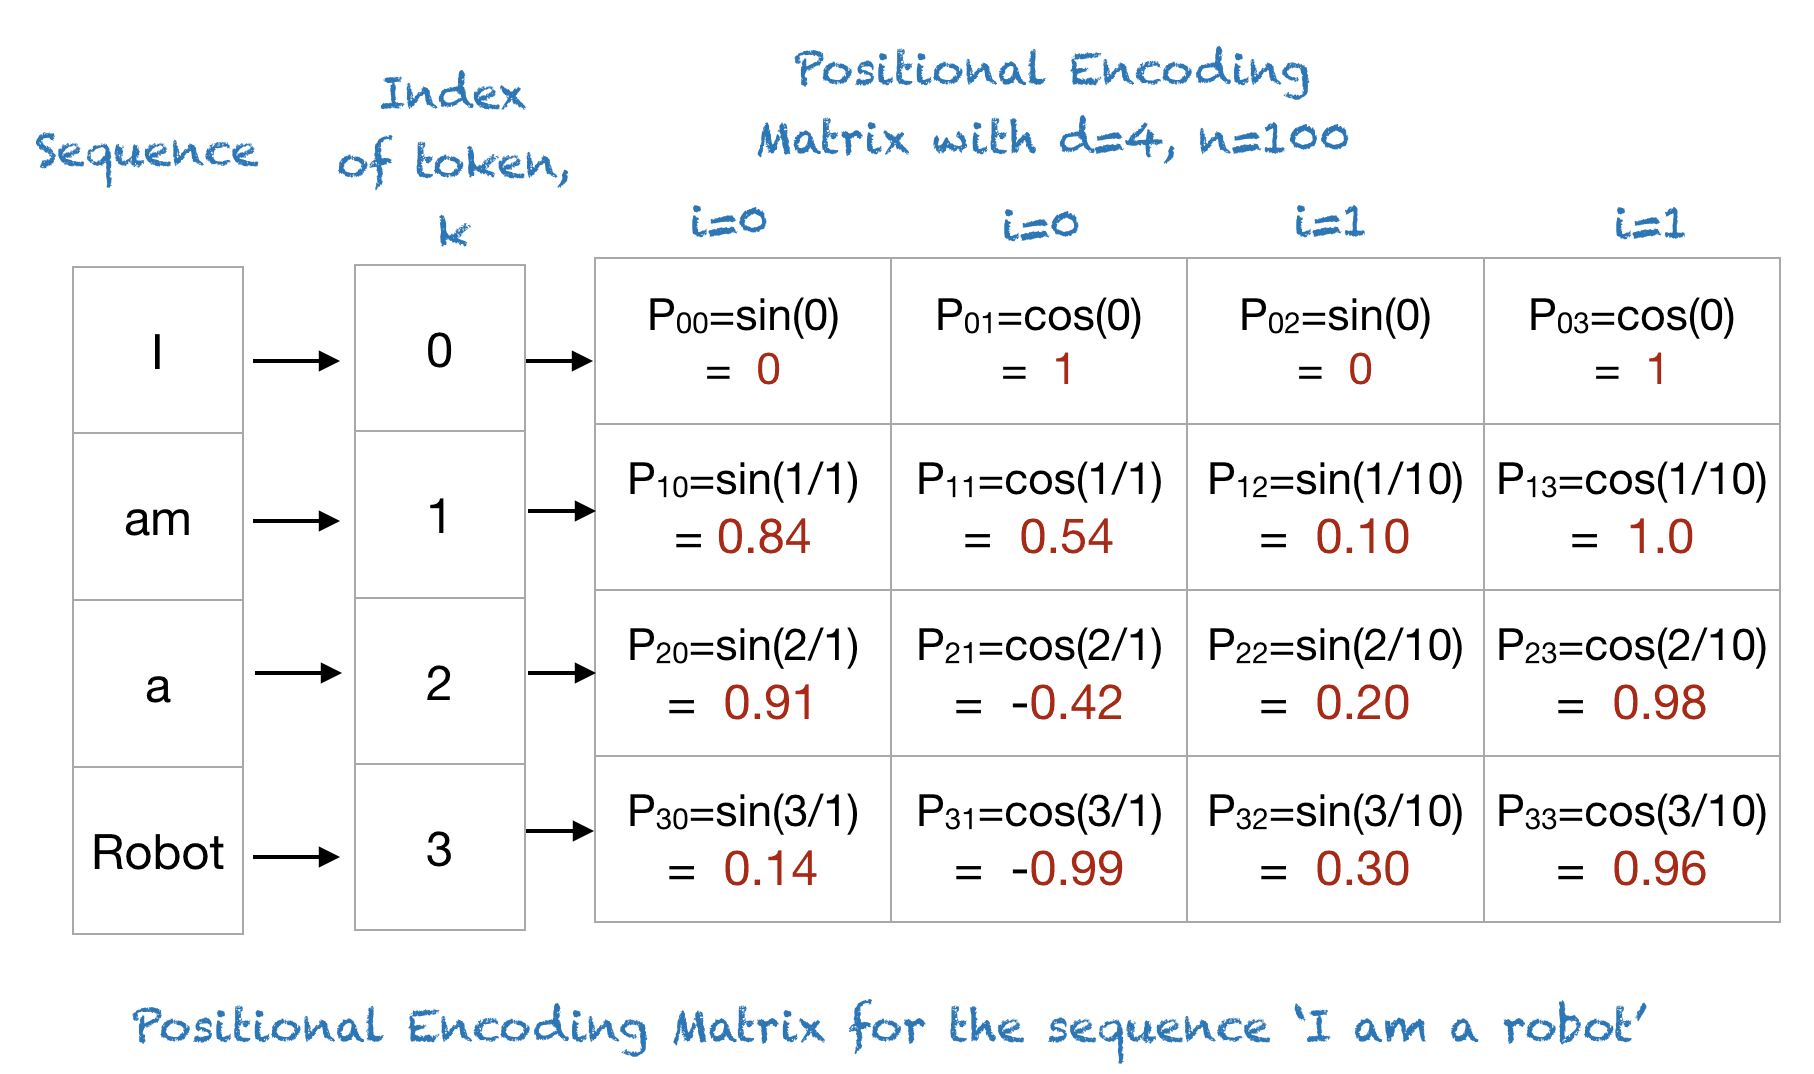

# Implementation
<hr style="border:2px solid black"> </hr>

In [2]:
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P


P = getPositionEncoding(seq_len=4, d=4, n=100)
print(P)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


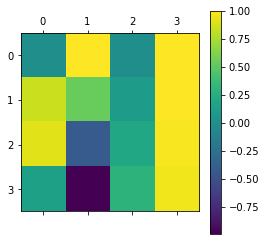

In [3]:
cax = plt.matshow(P)
plt.gcf().colorbar(cax);

In [4]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))

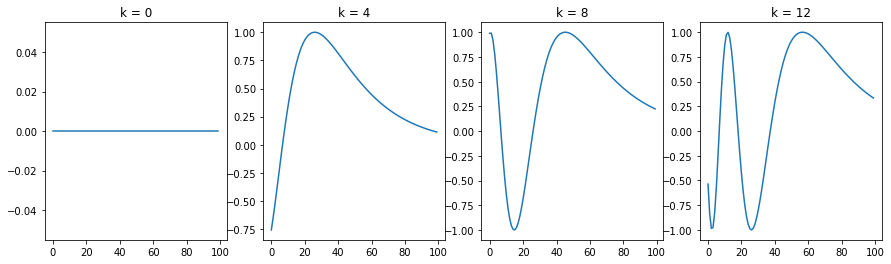

In [5]:
fig = plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)

<div class="alert alert-block alert-info">
<font color=black>

- You can see that each position corresponds to a different sinusoid, which encodes a single position into a vector. 

</font>
</div>

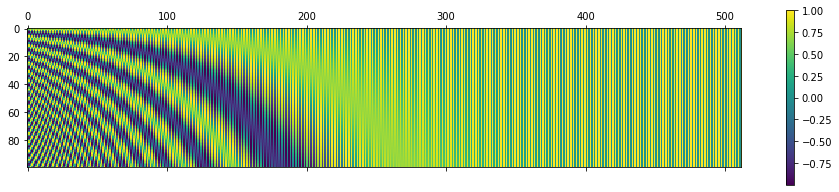

In [6]:
 # Setting n=10,000 as done in the original paper, you get the following:

P = getPositionEncoding(seq_len=100, d=512, n=10000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax);

# Conclusions
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-danger">
<font color=black>

- The sine and cosine functions have values in [-1, 1], which keeps the values of the positional encoding matrix in a normalized range.
- As the sinusoid for each position is different, you have a unique way of encoding each position.
- You have a way of measuring or quantifying the similarity between different positions, hence enabling you to encode the relative positions of words.


</font>
</div>

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- [A Gentle Introduction to Positional Encoding in Transformer Models, Part 1]()
- [A Gentle Introduction to Positional Encoding in Transformer Models, Part 2]()
- [Attention is All You Need](https://arxiv.org/abs/1706.03762)
    
</font>
</div>

# Requirements
<hr style="border:2px solid black"> </hr>

In [7]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

json      : 2.0.9
matplotlib: 3.5.1
autopep8  : 1.6.0
numpy     : 1.22.2

